In [123]:
why datediff -864 ,check it
replace zipcode xx with something
(['Date received', 'Product', 'Sub-product', 'Issue', 'Sub-issue',
       'Company', 'State', 'ZIP code', 'Submitted via', 'Date sent to company',
       'Company response to consumer', 'Timely response?',
       'Consumer disputed?', 'Complaint ID', 'Days', 'Product---Sub-product',
       'En_Product---Sub-product','Days']

??? 'Tags', 'Consumer complaint narrative','Company public response','Consumer consent provided?'---removed
 for some columns contains categorical,can we remove outliners-because hash encoding creating big values 
process-trying to reduce outliners by using logarithmic

1st trail
applying logarithamic then remove outliners then to whom I need to do scaling encoded or logarithmic or both--appling to log columns and removing org,encoded values,
remaining original
applying columns in model---strightly log col or org+en+log,
i am deriving days from two dates columns so,can I remove directly ..if I removed what will happen for new data

model starting issue
TypeError: float() argument must be a string or a real number, not 'Timestamp'--so removing start date and end data,is it fine because for predicted file


trying to pass categorical columns but not accepting ---especially
The error occurs because the RandomForestClassifier and StandardScaler expect numerical inputs, but the column 'Mortgage' is a string (likely a categorical feature). To resolve this, you'll need to convert the categorical features into numerical representations


I had removed multiple columns in model training,i am not sure how much it is correct



SyntaxError: invalid decimal literal (1834621834.py, line 13)

In [25]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import math
from sklearn.model_selection import train_test_split,KFold
import numpy as np
import seaborn as sns

In [63]:
CC_train=pd.read_csv("Consumer_Complaints_train.csv")
CC_test=pd.read_csv("Consumer_Complaints_test_share.csv")

In [111]:
import pandas as pd

CC_train['data']='train'
CC_test['data']='test'

extra_in_train = set(CC_train.columns) - set(CC_test.columns)
extra_in_test = set(CC_test.columns) - set(CC_train.columns)

print("Extra columns in train_dataset:", extra_in_train)
print("Extra columns in testing_dataset:", extra_in_test)

all_data=pd.concat([CC_train,CC_test],0,sort=False)

print("\nConcatenated DataFrame:")
print(all_data)

Extra columns in train_dataset: {'Consumer disputed?'}
Extra columns in testing_dataset: set()


TypeError: concat() takes 1 positional argument but 2 positional arguments (and 1 keyword-only argument) were given

In [113]:
    CC_train.drop(columns=['data'], inplace=True)
    CC_test.drop(columns=['data'], inplace=True) 

In [21]:
import pandas as pd


null_counts = CC_train.isnull().sum()
null_counts_percentage = (CC_train.isnull().sum() / len(CC_train)) * 100
data_types = CC_train.dtypes

combined_info = pd.DataFrame({
    'Null Count': null_counts,
    'Null counts%': null_counts_percentage,
    'Data Type': data_types
})

combined_info = combined_info.sort_values(by='Null counts%', ascending=False)

print(combined_info)

                              Null Count  Null counts% Data Type
Sub-issue                         292625     61.164748    object
Sub-product                       138473     28.943755    object
Product---Sub-product             138473     28.943755    object
ZIP code                            3848      0.804313    object
State                               3839      0.802431    object
Date received                          0      0.000000    object
Product                                0      0.000000    object
Issue                                  0      0.000000    object
Company                                0      0.000000    object
Submitted via                          0      0.000000    object
Date sent to company                   0      0.000000    object
Company response to consumer           0      0.000000    object
Timely response?                       0      0.000000     int32
Consumer disputed?                     0      0.000000     int32
Complaint ID             

In [117]:
Creditcard_duplicated=CC_train.duplicated().value_counts()
Creditcard_duplicated.head()

False    478421
Name: count, dtype: int64

In [29]:
CC_train = CC_train.drop(columns=['Tags', 'Consumer complaint narrative','Company public response','Consumer consent provided?'])

In [65]:
import pandas as pd

# Assuming CC_train is already defined and loaded
columns_to_check = ['Sub-issue', 'Sub-product', 'ZIP code', 'State']
categorical1 = CC_train[columns_to_check]

# Create a dictionary to store results for each column
top_values_data = {}

# Loop through each categorical column
for col in categorical1.columns:
    # Get the top 5 most frequent values and their counts
    top_values = categorical1[col].value_counts().nlargest(5)
    
    # Calculate the percentage of these values
    top_percentages = (top_values / len(categorical1[col])) * 100
    
    # Store in a DataFrame for easy understanding
    top_values_data[col] = pd.DataFrame({
        'Top Values': top_values.index,
        'Count': top_values.values,
        'Percentage (%)': top_percentages.values
    })

    print(f'Top 5 values for column: {col}')
    print(top_values_data[col])
    print('==============================================')

# Optional: Access each column's top 5 values DataFrame using top_values_data dictionary
# Example: top_values_data['Sub-issue']


Top 5 values for column: Sub-issue
                Top Values               Count  Percentage (%)
0                        Account status  22891     4.784698   
1                      Debt is not mine  22333     4.668064   
2               Information is not mine  17625     3.683994   
3  Not given enough info to verify debt  11124     2.325149   
4                         Debt was paid   9885     2.066172   
Top 5 values for column: Sub-product
                Top Values                Count  Percentage (%)
0                         Other mortgage  61522     12.859385  
1            Conventional fixed mortgage  48028     10.038857  
2                       Checking account  38310      8.007592  
3  Other (i.e. phone, health club, etc.)  25691      5.369957  
4                          I do not know  18169      3.797701  
Top 5 values for column: ZIP code
  Top Values  Count  Percentage (%)
0    300XX    1229      0.256887   
1    750XX     967      0.202123   
2    770XX     901      

In [67]:
# Replace null/NAN values with the mode for each column
for col in columns_to_check:
    CC_train[col].fillna(CC_train[col].mode()[0], inplace=True)

# Check if NAN values are replaced
print(CC_train[columns_to_check].isnull().sum())  # Should return 0 for each column


Sub-issue      0
Sub-product    0
ZIP code       0
State          0
dtype: int64


In [33]:
CC_train.columns

Index(['Date received', 'Product', 'Sub-product', 'Issue', 'Sub-issue',
       'Company', 'State', 'ZIP code', 'Submitted via', 'Date sent to company',
       'Company response to consumer', 'Timely response?',
       'Consumer disputed?', 'Complaint ID', 'Days'],
      dtype='object')

In [69]:
import pandas as pd

# Assuming CC_train is already loaded

# Convert 'Date received' and 'Date sent to company' to datetime datatype
CC_train['Date received'] = pd.to_datetime(CC_train['Date received'], errors='coerce')
CC_train['Date sent to company'] = pd.to_datetime(CC_train['Date sent to company'], errors='coerce')

# Calculate the difference in days
CC_train['Days'] = ( CC_train['Date sent to company']- CC_train['Date received'] ).dt.days

# Ensure 'Days' column is of numeric datatype
CC_train['Days'] = pd.to_numeric(CC_train['Days'], errors='coerce')

# Display the updated DataFrame
#print(CC_train1[['Date received', 'Date sent to company', 'Days']].head())
#CC_train1.to_excel(r'F:\jupyter\Date.xlsx', index=False)

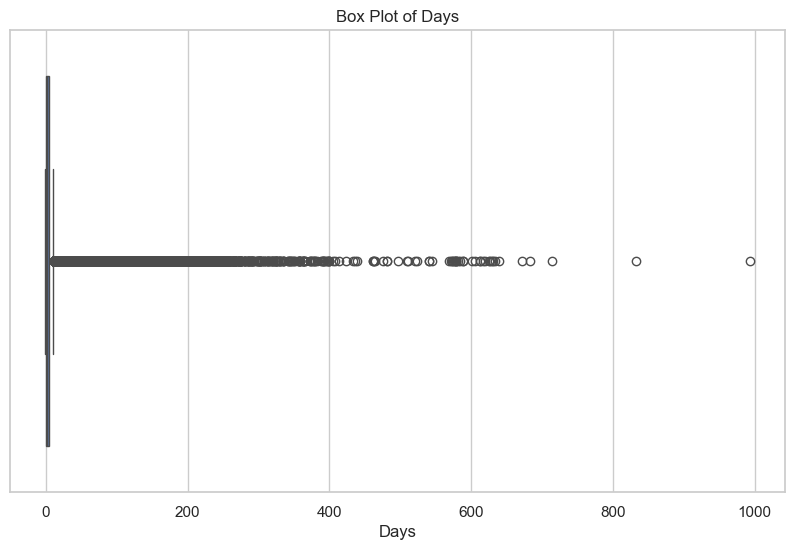

In [61]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for the plots
sns.set(style="whitegrid")

# Create a box plot for the 'Days' column
plt.figure(figsize=(10, 6))
sns.boxplot(x=CC_train['Days'])
plt.title('Box Plot of Days')
plt.xlabel('Days')
plt.show()


In [41]:
for col in CC_train.columns:
    print(col,':',CC_train[col].nunique())

Date received : 1759
Product : 12
Sub-product : 47
Issue : 95
Sub-issue : 68
Company : 3276
State : 62
ZIP code : 25962
Submitted via : 6
Date sent to company : 1706
Company response to consumer : 7
Timely response? : 2
Consumer disputed? : 2
Complaint ID : 478421
Days : 398


In [71]:
CC_train['Consumer disputed?']=np.where(CC_train['Consumer disputed?']=="Yes",1,0)
CC_train['Timely response?']=np.where(CC_train['Timely response?']=="Yes",1,0)

In [73]:
CC_train['Product---Sub-product'] = CC_train['Product'] + '---' + CC_train['Sub-product']

In [75]:
import pandas as pd

# Calculate the count of 'Consumer disputed?' for each 'Product---Sub-product'
encoded_count = CC_train.groupby('Product---Sub-product')['Consumer disputed?'].count()

# Sort based on the count in descending order
sorted_encoded_count = encoded_count.sort_values(ascending=False)

# Assign ranks to the sorted counts, and convert the rank to integers
ranked_encoded_count = sorted_encoded_count.rank(ascending=False, method='dense').astype(int)

# Combine the sorted counts with their ranks into a DataFrame
ranked_df = pd.DataFrame({
    'Count': sorted_encoded_count,
    'Rank': ranked_encoded_count
})

# Map the ranks back to the original CC_train DataFrame
CC_train['En_Product---Sub-product'] = CC_train['Product---Sub-product'].map(ranked_encoded_count)


In [77]:
 CC_train.drop(columns=['Complaint ID'], inplace=True)

In [79]:
import pandas as pd

# Define a function to apply ranking based on counts for a given column
def encode_and_rank(df, column, target):
    # Calculate the count of the target column for each unique value in the specified column
    encoded_count = df.groupby(column)[target].count()
    
    # Sort based on the count in descending order
    sorted_encoded_count = encoded_count.sort_values(ascending=False)
    
    # Assign ranks to the sorted counts, and convert the rank to integers
    ranked_encoded_count = sorted_encoded_count.rank(ascending=False, method='dense').astype(int)
    
    # Map the ranks back to the original DataFrame and create a new column with 'En_' prefix
    df[f'En_{column}'] = df[column].map(ranked_encoded_count)

# List of columns to apply the encoding
columns_to_encode = [ 'Submitted via', 'State', 'Sub-issue', 'Company response to consumer']

# Target column for encoding
target_column = 'Consumer disputed?'

# Apply the function to each column in the list
for col in columns_to_encode:
    encode_and_rank(CC_train, col, target_column)

# Now CC_train will have new encoded columns like 'En_Product---Sub-product', 'En_Submitted via', etc.


In [81]:
import pandas as pd
import hashlib

# Function to perform hash encoding
def hash_encode(df, column, target):
    # Create a new column for hashed values
    df[f'En_{column}'] = df[column].astype(str) + df[target].astype(str)
    df[f'En_{column}'] = df[f'En_{column}'].apply(lambda x: int(hashlib.md5(x.encode()).hexdigest(), 16) % 2**32)

# Apply hash encoding on 'Company'
hash_encode(CC_train, 'Company', 'Consumer disputed?')

# Apply hash encoding on 'ZIP code'
hash_encode(CC_train, 'ZIP code', 'Consumer disputed?')

# Now CC_train will have new hashed columns 'En_Company' and 'En_ZIP code'


In [95]:
CC_train1= CC_train.select_dtypes(include=['int32','int64', 'float64']).columns
print(CC_train1)

Index(['Timely response?', 'Consumer disputed?', 'Days',
       'En_Product---Sub-product', 'En_Submitted via', 'En_State',
       'En_Sub-issue', 'En_Company response to consumer', 'En_Company',
       'En_ZIP code', 'log_En_Product---Sub-product', 'log_Days',
       'log_En_Submitted via', 'log_En_State', 'log_En_Sub-issue',
       'log_En_Company response to consumer'],
      dtype='object')


In [83]:
import pandas as pd

def whisker(CC_train, col):
    q1 = CC_train[col].quantile(0.25)
    q3 = CC_train[col].quantile(0.75)
    iqr = q3 - q1
    lower = q1 - (1.5 * iqr)
    upper = q3 + (1.5 * iqr)
    
    between_q1_q3 = CC_train[(CC_train[col] >= q1) & (CC_train[col] <= q3)]
    below_q1 = CC_train[CC_train[col] < q1]
    above_q3 = CC_train[CC_train[col] > q3]
    
    between_q1_q3_range = (between_q1_q3[col].min(), between_q1_q3[col].max())
    below_q1_range = (below_q1[col].min(), below_q1[col].max()) if not below_q1.empty else (None, None)
    above_q3_range = (above_q3[col].min(), above_q3[col].max()) if not above_q3.empty else (None, None)
    
    return {
        "Column": col,
        "Lower Bound": lower,
        "Upper Bound": upper,
        "Between Q1-Q3 (Min, Max)": between_q1_q3_range,
        "Below Q1 (Min, Max)": below_q1_range,
        "Above Q3 (Min, Max)": above_q3_range
    }

# Example usage
numeric_columns = CC_train.select_dtypes(include=['int32', 'int64', 'float64']).columns
results = []

for col in numeric_columns:
    result = whisker(CC_train, col)
    results.append(result)

# Convert results to DataFrame
result_df = pd.DataFrame(results)

# Display the table in a properly formatted way
pd.set_option('display.max_columns', None)  # Ensure all columns are shown
pd.set_option('display.width', None)        # Disable wrapping for wide tables
pd.set_option('display.colheader_justify', 'center')  # Center headers

# Print the DataFrame
print(result_df.to_string(index=False))


             Column               Lower Bound  Upper Bound Between Q1-Q3 (Min, Max)  Below Q1 (Min, Max)    Above Q3 (Min, Max)   
               Timely response?  1.000000e+00          1.0                   (1, 1)                (0, 0)             (None, None)
             Consumer disputed?  0.000000e+00          0.0                   (0, 0)          (None, None)                   (1, 1)
                           Days -6.000000e+00         10.0                   (0, 4)              (-1, -1)                 (5, 993)
       En_Product---Sub-product -8.500000e+00         19.5                   (2, 9)                (1, 1)                 (10, 52)
               En_Submitted via -5.000000e-01          3.5                   (1, 2)          (None, None)                   (3, 6)
                       En_State -1.900000e+01         37.0                  (2, 16)                (1, 1)                 (17, 62)
                   En_Sub-issue -3.500000e+00          8.5                   (1, 4)

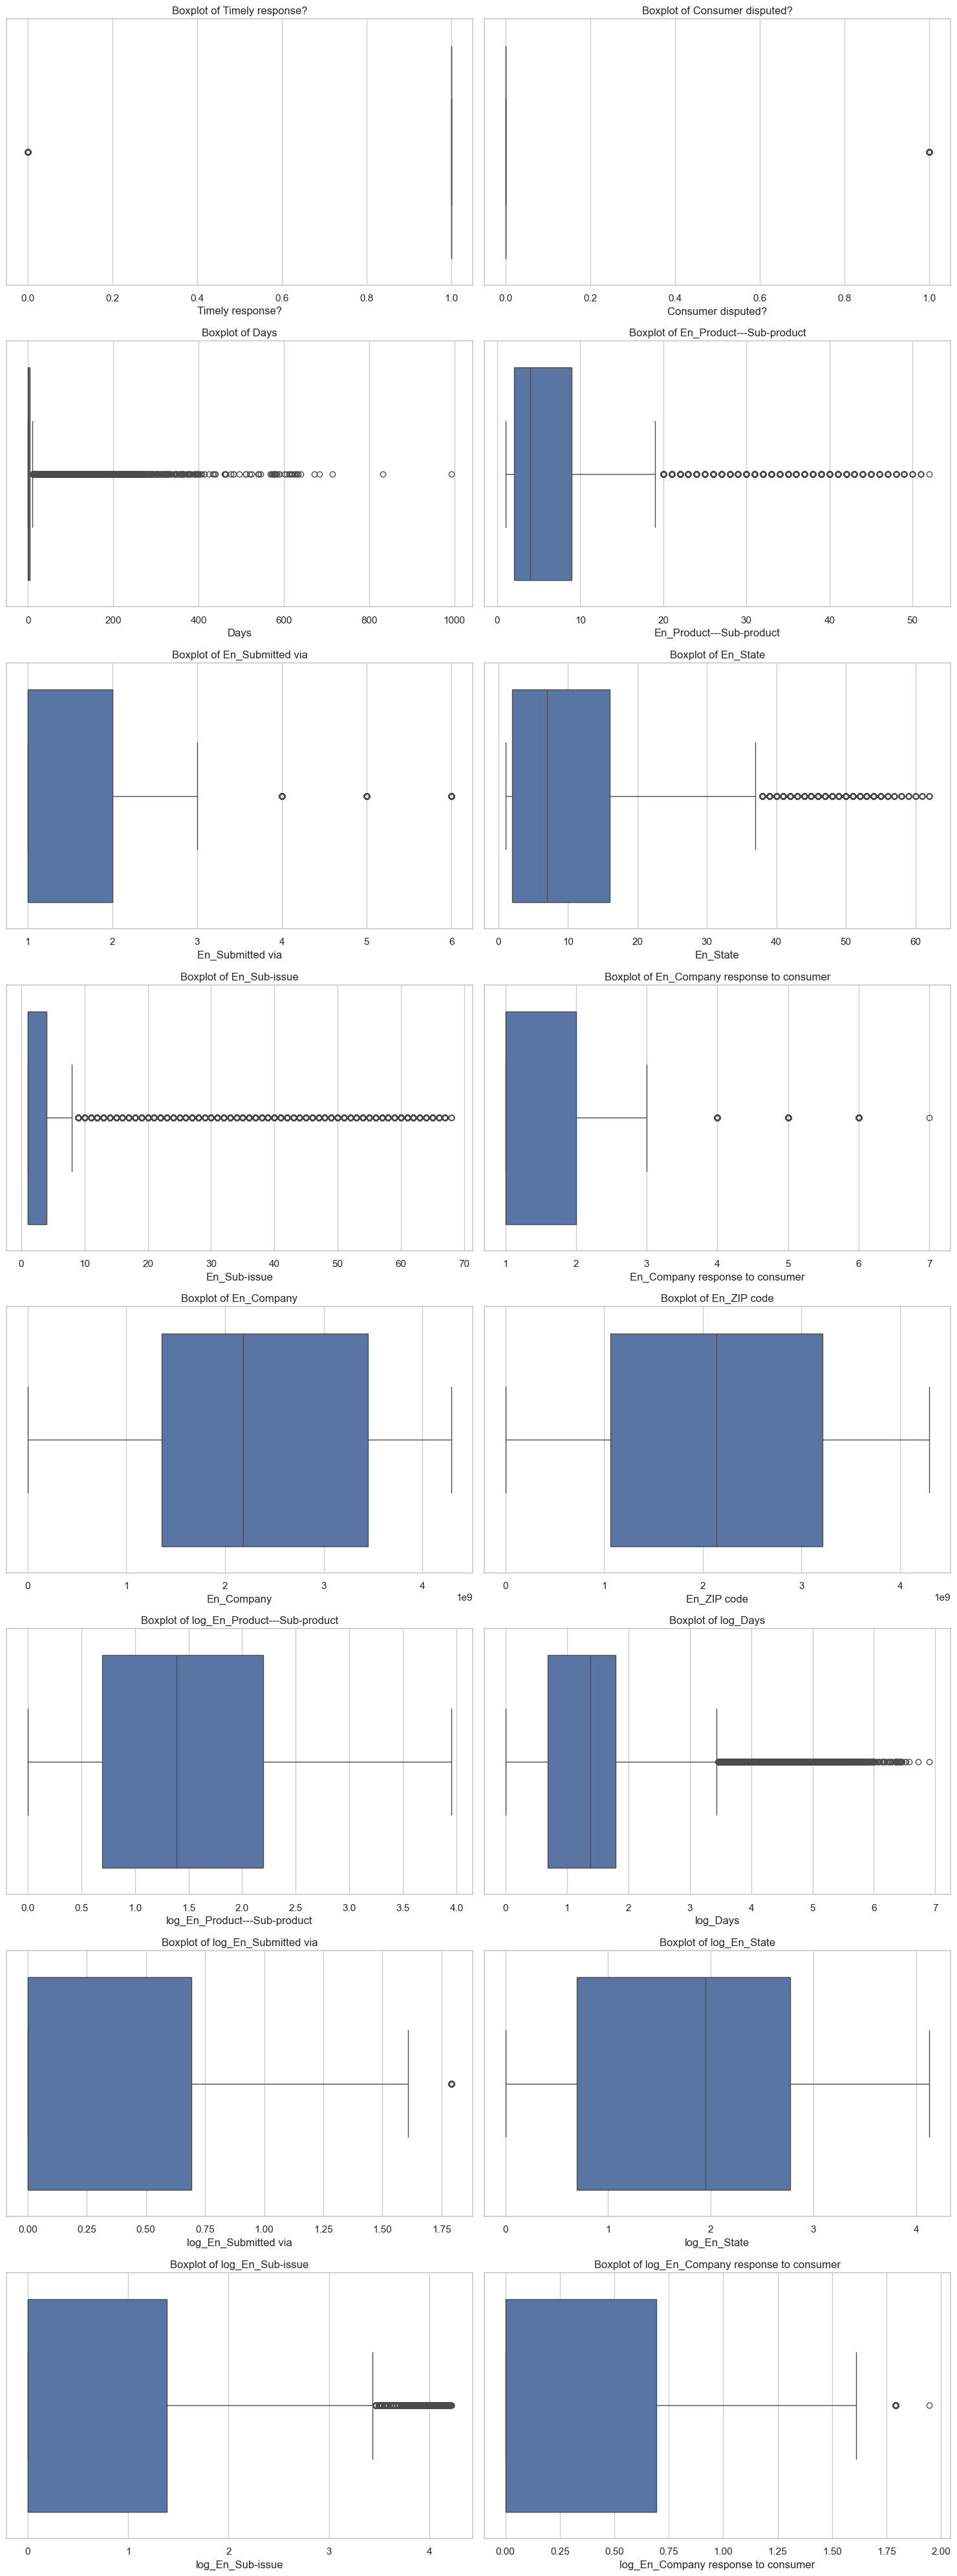

In [93]:
import matplotlib.pyplot as plt
import seaborn as sns
import math

# Get all numeric columns (both int and float) from the Property DataFrame
numeric_columns = CC_train.select_dtypes(include=['int32', 'int64', 'float64']).columns

# Determine the number of rows and columns needed for the subplots
num_plots = len(numeric_columns)
num_cols = 2  # Number of columns for subplots
num_rows = math.ceil(num_plots / num_cols)  # Calculate the required number of rows

# Set the figure size dynamically based on the number of rows
plt.figure(figsize=(15, 5 * num_rows))

# Loop through each numeric column and create a boxplot
for i, col in enumerate(numeric_columns, 1):
    plt.subplot(num_rows, num_cols, i)  # Create subplots dynamically
    sns.boxplot(x=CC_train[col])  # Boxplot for each numeric column
    plt.title(f'Boxplot of {col}')  # Set the title to show the column name

# Adjust layout and display the plots
plt.tight_layout()
plt.show()


In [157]:
CC_train.to_excel(r'F:\jupyter\Card21.xlsx', index=False)

In [ ]:
logarithmic starts  please dont touch

In [91]:
import numpy as np
import pandas as pd

# List of columns to apply logarithmic transformation
columns_to_transform = ['En_Product---Sub-product', 'Days', 'En_Submitted via', 'En_State', 'En_Sub-issue', 'En_Company response to consumer']

# Create new columns with logarithmic transformation
for col in columns_to_transform:
    # Check if the column exists in CC_train and avoid negative or zero values
    if col in CC_train.columns:
        # Apply logarithmic transformation
        CC_train[f'log_{col}'] = np.log(CC_train[col].replace(0, np.nan))  # Replace 0s with NaN to avoid log(0)

# Display the first few rows of the modified DataFrame to verify the new columns


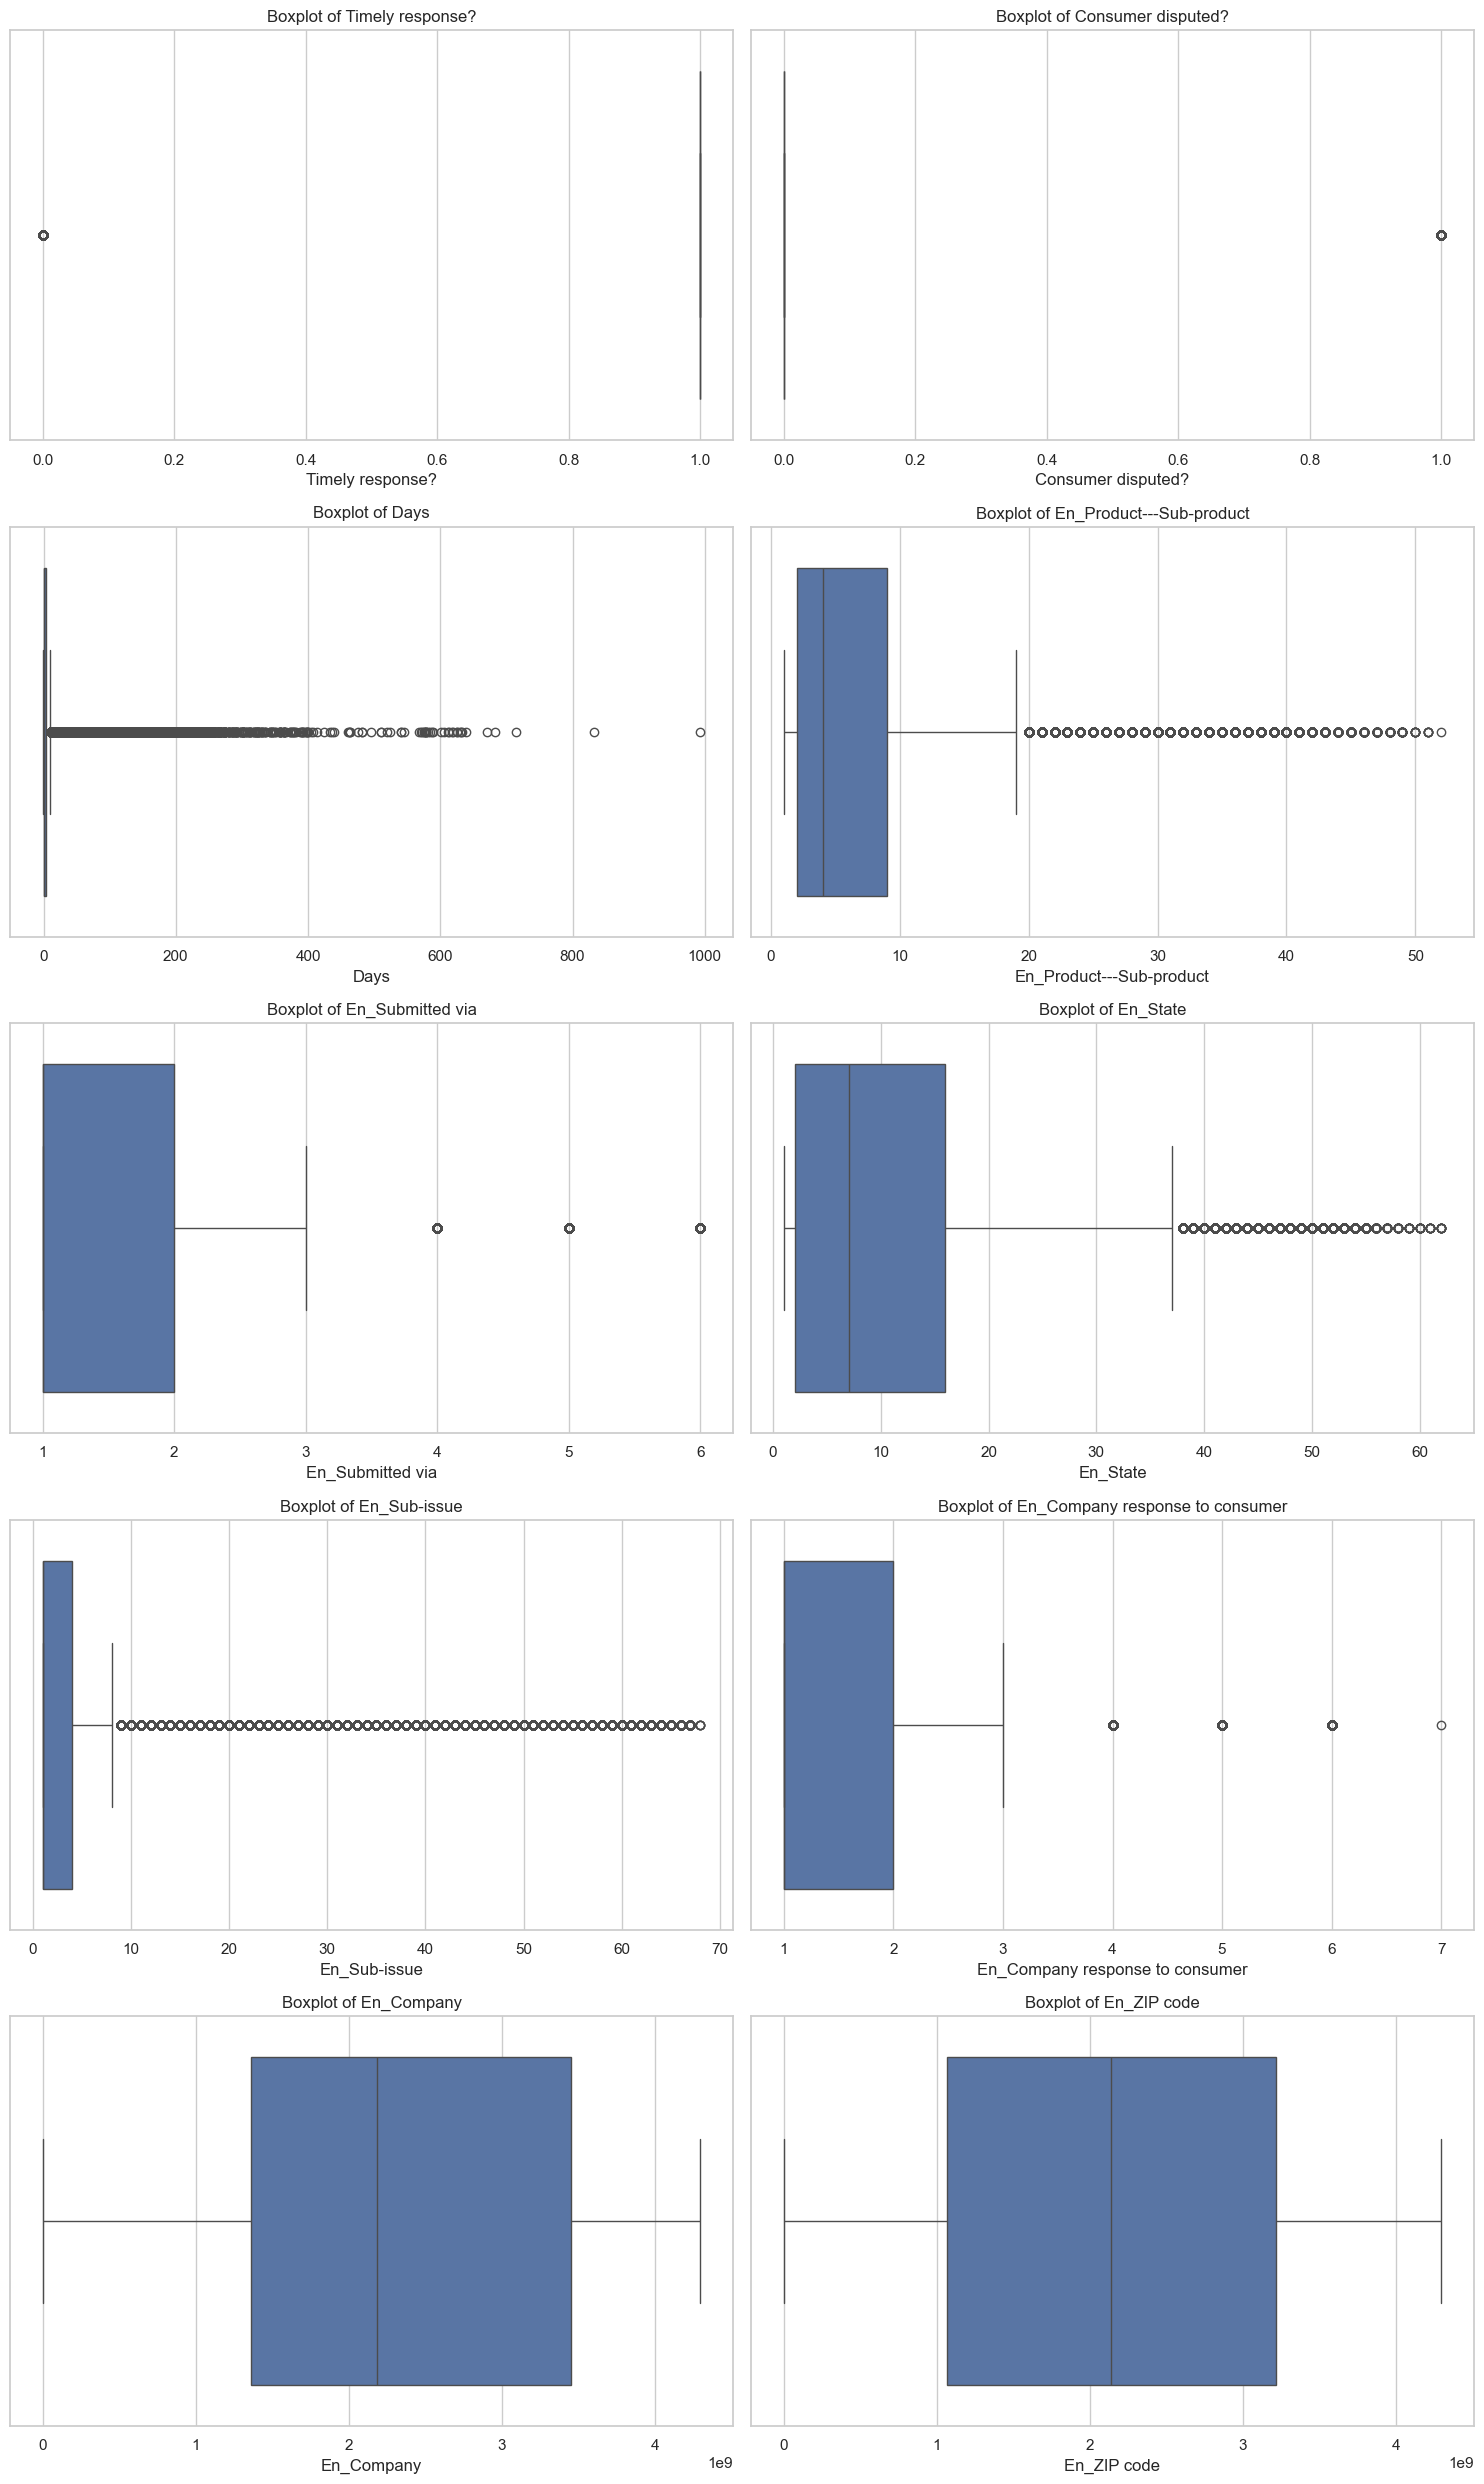

In [110]:
import matplotlib.pyplot as plt
import seaborn as sns
import math

# Get all numeric columns (both int and float) from the Property DataFrame
numeric_columns = CC_train.select_dtypes(include="number").columns

# Determine the number of rows and columns needed for the subplots
num_plots = len(numeric_columns)
num_cols = 2  # Number of columns for subplots
num_rows = math.ceil(num_plots / num_cols)  # Calculate the required number of rows

# Set the figure size dynamically based on the number of rows
plt.figure(figsize=(15, 5 * num_rows))

# Loop through each numeric column and create a boxplot
for i, col in enumerate(numeric_columns, 1):
    plt.subplot(num_rows, num_cols, i)  # Create subplots dynamically
    sns.boxplot(x=CC_train[col])  # Boxplot for each numeric column
    plt.title(f'Boxplot of {col}')  # Set the title to show the column name

# Adjust layout and display the plots
plt.tight_layout()
plt.show()

In [115]:
import pandas as pd

# Get all columns from CC_train that are of numeric datatype
numeric_columns = CC_train.select_dtypes(include=['int32', 'int64', 'float64']).columns

# Display the list of numeric columns
print("Columns in CC_train that contain numeric datatypes:")
print(numeric_columns)


Columns in CC_train that contain numeric datatypes:
Index(['Timely response?', 'Consumer disputed?', 'Days',
       'En_Product---Sub-product', 'En_Submitted via', 'En_State',
       'En_Sub-issue', 'En_Company response to consumer', 'En_Company',
       'En_ZIP code', 'log_En_Product---Sub-product', 'log_Days',
       'log_En_Submitted via', 'log_En_State', 'log_En_Sub-issue',
       'log_En_Company response to consumer'],
      dtype='object')


In [115]:
import pandas as pd


null_counts = CC_train.isnull().sum()
null_counts_percentage = (CC_train.isnull().sum() / len(CC_train)) * 100
data_types = CC_train.dtypes

combined_info = pd.DataFrame({
    'Null Count': null_counts,
    'Null counts%': null_counts_percentage,
    'Data Type': data_types
})

combined_info = combined_info.sort_values(by='Null counts%', ascending=False)

print(combined_info)

                                 Null Count  Null counts%    Data Type   
Date received                         0           0.0      datetime64[ns]
Product                               0           0.0              object
En_Company                            0           0.0               int64
En_Company response to consumer       0           0.0               int32
En_Sub-issue                          0           0.0               int32
En_State                              0           0.0               int32
En_Submitted via                      0           0.0               int32
En_Product---Sub-product              0           0.0               int32
Product---Sub-product                 0           0.0              object
Days                                  0           0.0               int64
Consumer disputed?                    0           0.0               int32
Timely response?                      0           0.0               int32
Company response to consumer          

In [99]:
# Define the function to remove outliers using IQR
def remove_outliers(CC_train, col):
    # Calculate Q1 (25th percentile) and Q3 (75th percentile)
    q1 = CC_train[col].quantile(0.25)
    q3 = CC_train[col].quantile(0.75)
    iqr = q3 - q1  # Interquartile Range (IQR)

    # Define lower and upper bounds for outliers
    lower_bound = q1 - (1.5 * iqr)
    upper_bound = q3 + (1.5 * iqr)

    # Filter out the outliers by keeping only the data within the bounds
    filtered_data = CC_train[(CC_train[col] >= lower_bound) & (CC_train[col] <= upper_bound)]
    
    return filtered_data

# List of specific columns to apply the outlier removal
specific_columns = ['log_Days','En_Product---Sub-product',
       'En_Company',
       'En_ZIP code', 'log_En_Product---Sub-product', 'log_Days',
       'log_En_Submitted via', 'log_En_State', 'log_En_Sub-issue',
       'log_En_Company response to consumer']


# Remove outliers for each specific column
for col in specific_columns:
    if col in CC_train.columns:  # Check if the column exists in the DataFrame
        CC_train = remove_outliers(CC_train, col)



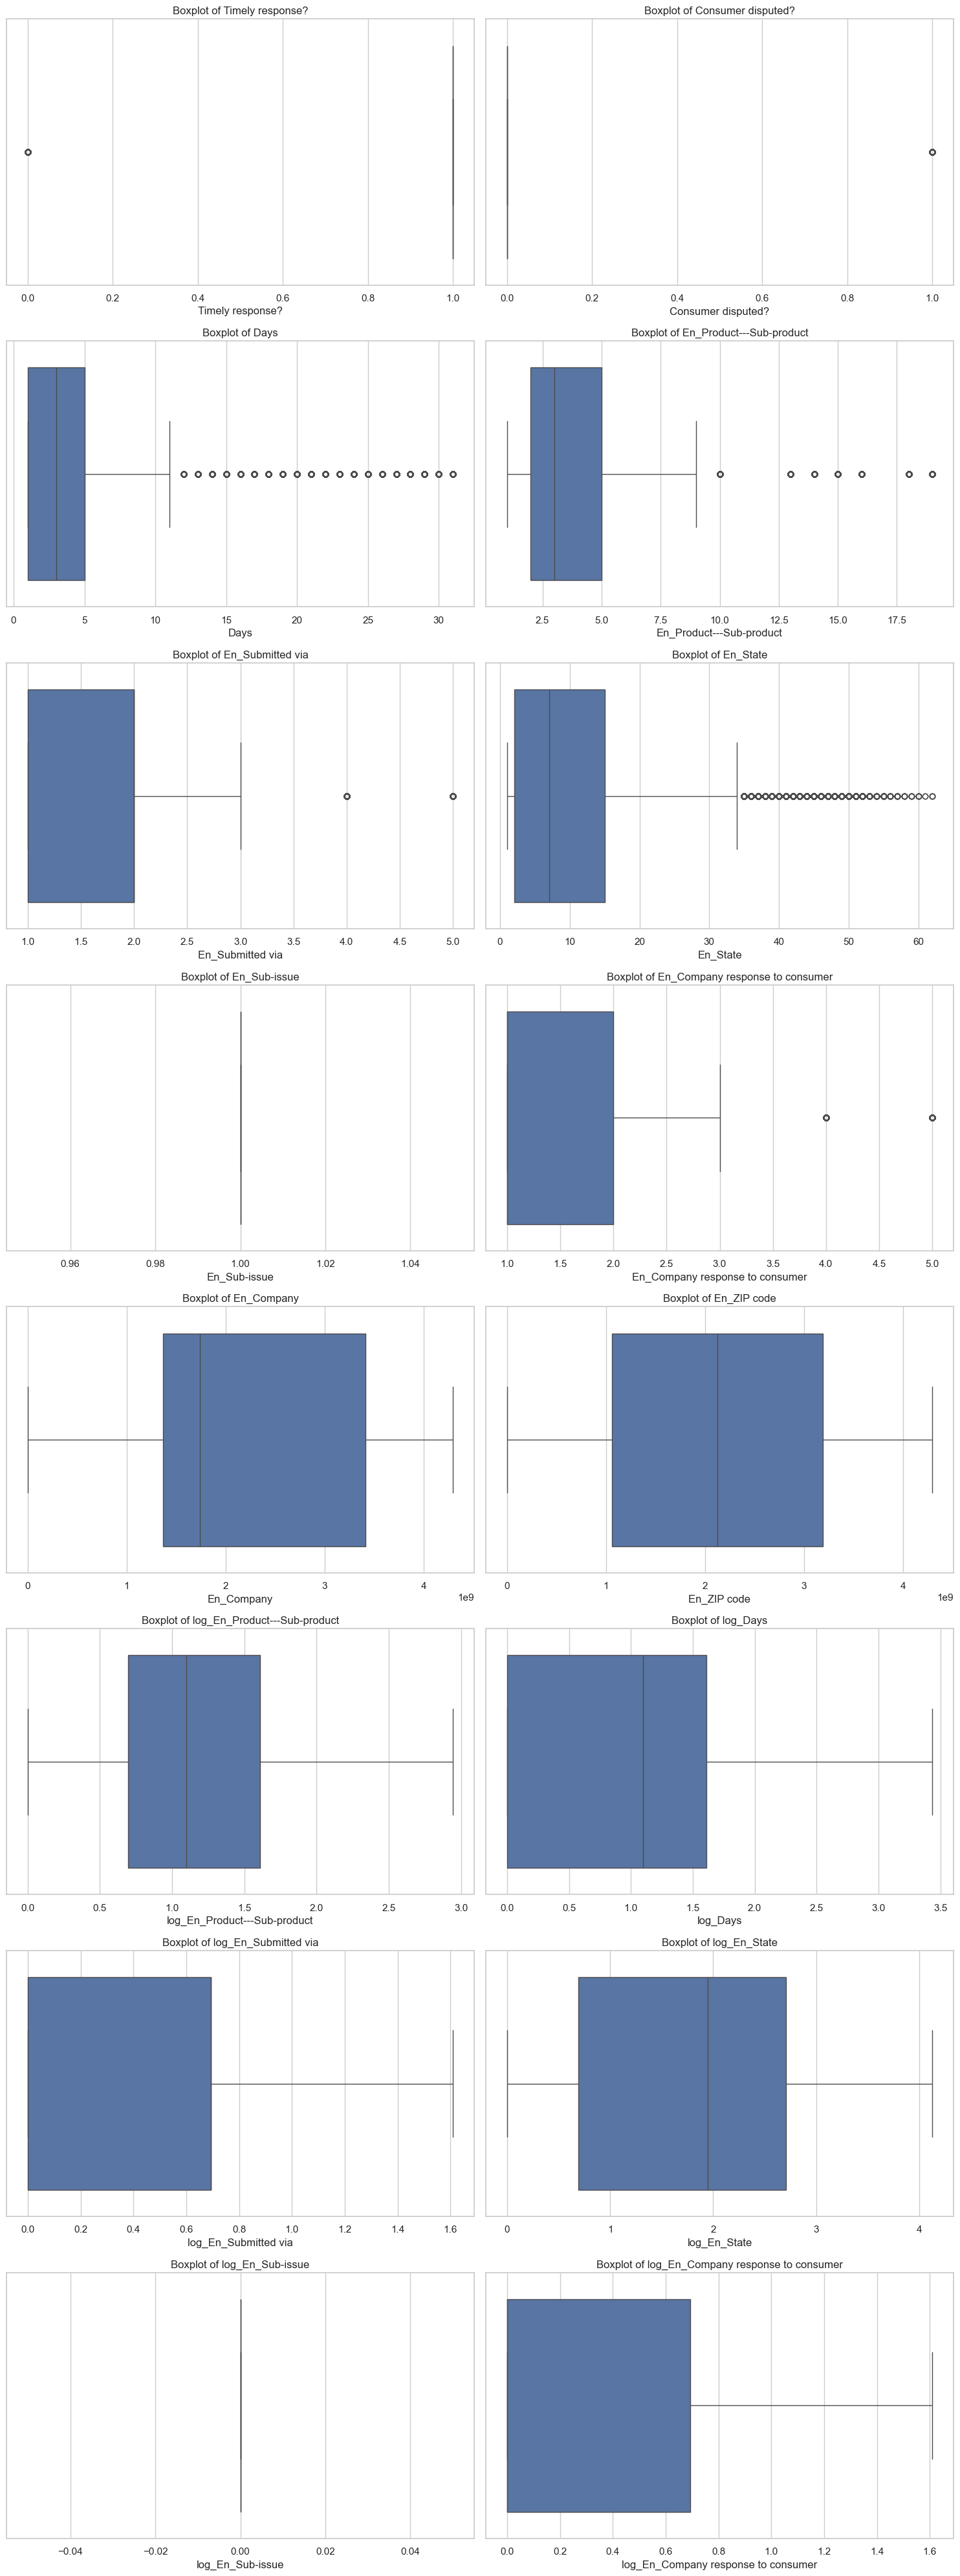

In [101]:
import matplotlib.pyplot as plt
import seaborn as sns
import math

# Get all numeric columns (both int and float) from the Property DataFrame
numeric_columns = CC_train.select_dtypes(include="number").columns

# Determine the number of rows and columns needed for the subplots
num_plots = len(numeric_columns)
num_cols = 2  # Number of columns for subplots
num_rows = math.ceil(num_plots / num_cols)  # Calculate the required number of rows

# Set the figure size dynamically based on the number of rows
plt.figure(figsize=(15, 5 * num_rows))

# Loop through each numeric column and create a boxplot
for i, col in enumerate(numeric_columns, 1):
    plt.subplot(num_rows, num_cols, i)  # Create subplots dynamically
    sns.boxplot(x=CC_train[col])  # Boxplot for each numeric column
    plt.title(f'Boxplot of {col}')  # Set the title to show the column name

# Adjust layout and display the plots
plt.tight_layout()
plt.show()

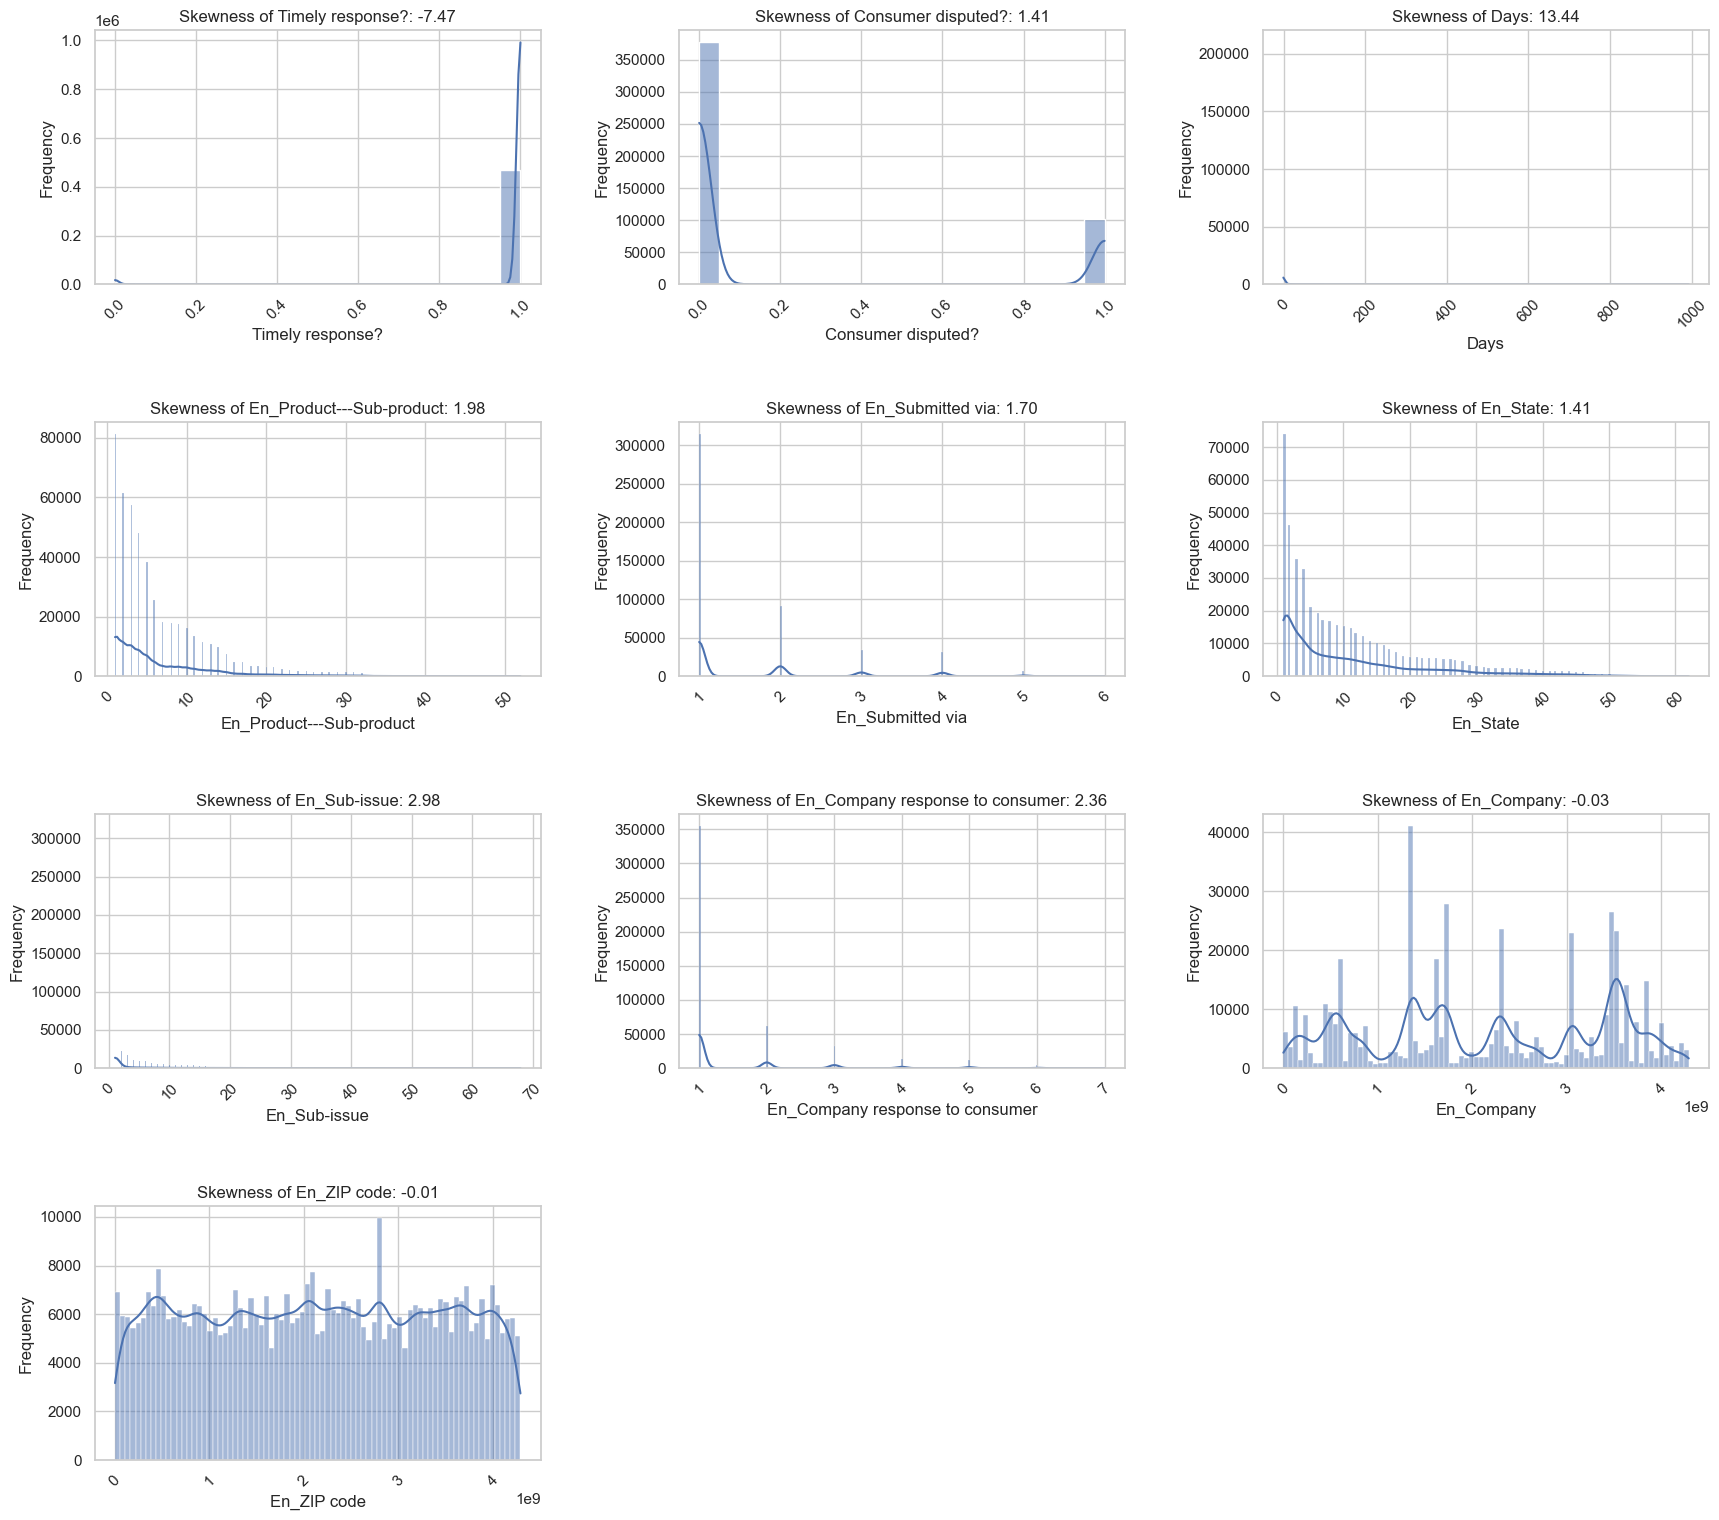

In [57]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Automatically select all numeric columns (int and float) from Property DataFrame
numeric_columns = CC_train.select_dtypes(include=['int32','int64', 'float64']).columns

# Calculate the number of rows required to fit 3 plots per row
n_cols = 3
n_rows = (len(numeric_columns) + n_cols - 1) // n_cols  # Ensure enough rows for all columns

# Create a figure with subplots
plt.figure(figsize=(18, 4 * n_rows))  # Dynamic figure size based on rows

# Loop through each numeric column and create a histogram with KDE
for i, col in enumerate(numeric_columns, 1):
    plt.subplot(n_rows, n_cols, i)  # Create a grid with n_rows and 3 columns
    sns.histplot(CC_train[col], kde=True)  # Plot histogram with KDE
    plt.title(f'Skewness of {col}: {CC_train[col].skew():.2f}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    
    # Rotate x-axis labels for better readability if needed
    plt.xticks(rotation=45)

# Adjust layout to prevent overlap and display the plots
plt.tight_layout(pad=3.0)  # Increased padding between subplots
plt.show()


In [124]:
for col in CC_train.columns:
    print(col,':',CC_train[col].nunique())

Date received : 1759
Product : 7
Sub-product : 17
Issue : 63
Sub-issue : 61
Company : 3137
State : 62
ZIP code : 25489
Submitted via : 6
Date sent to company : 1705
Company response to consumer : 7
Timely response? : 2
Consumer disputed? : 2
Days : 394
Product---Sub-product : 19
En_Product---Sub-product : 19
En_Submitted via : 6
En_State : 62
En_Sub-issue : 61
En_Company response to consumer : 7
En_Company : 4980
En_ZIP code : 39850


In [103]:
CC_train['Consumer disputed?'].value_counts(normalize=True) * 100


Consumer disputed?
0    78.667918
1    21.332082
Name: proportion, dtype: float64

In [105]:
from sklearn.preprocessing import MinMaxScaler

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# List of columns to apply MinMax scaling to
columns_to_scale = [
    'En_Company', 'En_ZIP code', 'log_En_Product---Sub-product', 'log_Days',
    'log_En_Submitted via', 'log_En_State', 'log_En_Sub-issue', 'log_En_Company response to consumer'
]

# Apply the scaler to the specific columns and create a scaled version of the data
CC_train[columns_to_scale] = scaler.fit_transform(CC_train[columns_to_scale])

# If you want to check the scaled values
print(CC_train[columns_to_scale].head())


   En_Company  En_ZIP code  log_En_Product---Sub-product  log_Days  \
0   0.404359    0.334572              0.373114            0.000000   
2   0.710856    0.176244              0.000000            0.886585   
4   0.318777    0.132787              0.373114            0.605547   
5   0.318777    0.534350              0.235409            0.468679   
6   0.898481    0.963181              0.235409            0.319923   

   log_En_Submitted via  log_En_State  log_En_Sub-issue  \
0        0.000000          0.621484           0.0         
2        0.430677          0.000000           0.0         
4        0.000000          0.671795           0.0         
5        0.430677          0.789433           0.0         
6        0.430677          0.167949           0.0         

   log_En_Company response to consumer  
0               0.000000                
2               0.430677                
4               0.000000                
5               0.000000                
6               0.0

In [107]:
CC_train.columns

Index(['Date received', 'Product', 'Sub-product', 'Issue', 'Sub-issue',
       'Consumer complaint narrative', 'Company public response', 'Company',
       'State', 'ZIP code', 'Tags', 'Consumer consent provided?',
       'Submitted via', 'Date sent to company', 'Company response to consumer',
       'Timely response?', 'Consumer disputed?', 'Days',
       'Product---Sub-product', 'En_Product---Sub-product', 'En_Submitted via',
       'En_State', 'En_Sub-issue', 'En_Company response to consumer',
       'En_Company', 'En_ZIP code', 'log_En_Product---Sub-product', 'log_Days',
       'log_En_Submitted via', 'log_En_State', 'log_En_Sub-issue',
       'log_En_Company response to consumer'],
      dtype='object')

In [117]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, roc_auc_score, f1_score
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

# Features and target variable
X = CC_train[['Timely response?', 'Days',
       'En_Product---Sub-product', 'En_Submitted via', 'En_State',
       'En_Sub-issue', 'En_Company response to consumer', 'En_Company',
       'En_ZIP code', 'log_En_Product---Sub-product', 'log_Days',
       'log_En_Submitted via', 'log_En_State', 'log_En_Sub-issue',
       'log_En_Company response to consumer']]


y = CC_train['Consumer disputed?']

# Split the data into training (70%) and testing (30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define the oversampling (SMOTE) and undersampling strategy
over = SMOTE(sampling_strategy=0.5, random_state=42)  # Adjust sampling strategy
under = RandomUnderSampler(sampling_strategy=0.7, random_state=42)  # Adjust undersampling

# Create pipeline with scaling, oversampling, and undersampling
pipeline = Pipeline(steps=[('scaler', StandardScaler()), 
                           ('over', over), 
                           ('under', under), 
                           ('model', RandomForestClassifier(random_state=42))])

# Fit the pipeline on the training data
pipeline.fit(X_train, y_train)

# Make predictions on the test set
y_pred = pipeline.predict(X_test)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Metrics
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Output results
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"Accuracy: {accuracy:.2f}")
print(f"ROC-AUC: {roc_auc:.2f}")
print("Classification Report:")
print(class_report)


Confusion Matrix:
[[39857  1303]
 [ 2106  9168]]
Precision: 0.88
Recall: 0.81
F1 Score: 0.84
Accuracy: 0.93
ROC-AUC: 0.89
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.97      0.96     41160
           1       0.88      0.81      0.84     11274

    accuracy                           0.93     52434
   macro avg       0.91      0.89      0.90     52434
weighted avg       0.93      0.93      0.93     52434



In [119]:
import pandas as pd
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, roc_auc_score, f1_score
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

# Features and target variable
X = CC_train[['Timely response?', 'Days',
       'En_Product---Sub-product', 'En_Submitted via', 'En_State',
       'En_Sub-issue', 'En_Company response to consumer', 'En_Company',
       'En_ZIP code', 'log_En_Product---Sub-product', 'log_Days',
       'log_En_Submitted via', 'log_En_State', 'log_En_Sub-issue',
       'log_En_Company response to consumer']]
y = CC_train['Consumer disputed?']

# Split the data into training (70%) and testing (30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define the oversampling (SMOTE) and undersampling strategy
over = SMOTE(sampling_strategy=0.5, random_state=42)  # Adjust sampling strategy
under = RandomUnderSampler(sampling_strategy=0.7, random_state=42)  # Adjust undersampling

# Create pipeline with scaling, oversampling, and undersampling
pipeline = Pipeline(steps=[('scaler', StandardScaler()), 
                           ('over', over), 
                           ('under', under), 
                           ('model', SVC(random_state=42, class_weight='balanced'))])  # Use SVC instead of RandomForest

# Fit the pipeline on the training data
pipeline.fit(X_train, y_train)

# Make predictions on the test set
y_pred = pipeline.predict(X_test)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Metrics
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Output results
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"Accuracy: {accuracy:.2f}")
print(f"ROC-AUC: {roc_auc:.2f}")
print("Classification Report:")
print(class_report)


Confusion Matrix:
[[28462 12698]
 [ 4292  6982]]
Precision: 0.35
Recall: 0.62
F1 Score: 0.45
Accuracy: 0.68
ROC-AUC: 0.66
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.69      0.77     41160
           1       0.35      0.62      0.45     11274

    accuracy                           0.68     52434
   macro avg       0.61      0.66      0.61     52434
weighted avg       0.76      0.68      0.70     52434



In [121]:
import pandas as pd
from xgboost import XGBClassifier  # Import XGBoost classifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, recall_score, roc_auc_score, f1_score
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

# Features and target variable
X = CC_train[['Timely response?', 'Days',
       'En_Product---Sub-product', 'En_Submitted via', 'En_State',
       'En_Sub-issue', 'En_Company response to consumer', 'En_Company',
       'En_ZIP code', 'log_En_Product---Sub-product', 'log_Days',
       'log_En_Submitted via', 'log_En_State', 'log_En_Sub-issue',
       'log_En_Company response to consumer']]
y = CC_train['Consumer disputed?']

# Split the data into training (70%) and testing (30%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Define the oversampling (SMOTE) and undersampling strategy
over = SMOTE(sampling_strategy=0.5, random_state=42)  # Adjust sampling strategy
under = RandomUnderSampler(sampling_strategy=0.7, random_state=42)  # Adjust undersampling

# Create pipeline with scaling, oversampling, and undersampling
pipeline = Pipeline(steps=[('scaler', StandardScaler()), 
                           ('over', over), 
                           ('under', under), 
                           ('model', XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='logloss', 
                                                   n_estimators=100, max_depth=6, learning_rate=0.1))])

# Fit the pipeline on the training data
pipeline.fit(X_train, y_train)

# Make predictions on the test set
y_pred = pipeline.predict(X_test)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Metrics
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Output results
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")
print(f"Accuracy: {accuracy:.2f}")
print(f"ROC-AUC: {roc_auc:.2f}")
print("Classification Report:")
print(class_report)


Confusion Matrix:
[[39877  1283]
 [  294 10980]]
Precision: 0.90
Recall: 0.97
F1 Score: 0.93
Accuracy: 0.97
ROC-AUC: 0.97
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.97      0.98     41160
           1       0.90      0.97      0.93     11274

    accuracy                           0.97     52434
   macro avg       0.94      0.97      0.96     52434
weighted avg       0.97      0.97      0.97     52434

